# Quais fatores econômicos ou sociais lavam a um maior sucesso eleitoral dos candidatos?

### Datasets Utilizados
* Candidatos
* Eleições
* Resultados de Eleições

In [42]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


## Importando Bibliotecas

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dados

### Candidatos

In [44]:
candidatos_df = pd.read_csv('datasets/cand_rs_2022.csv', encoding='latin1', sep=';')

candidatos_df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,TP_ABRANGENCIA_ELEICAO,...,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_ESTADO_CIVIL,DS_ESTADO_CIVIL,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO,CD_SIT_TOT_TURNO,DS_SIT_TOT_TURNO
0,25/09/2024,03:36:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6,ENSINO MÉDIO COMPLETO,1,SOLTEIRO(A),1,BRANCA,596,AUXILIAR DE LABORATÓRIO,4,NÃO ELEITO
1,25/09/2024,03:36:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,4,ENSINO FUNDAMENTAL COMPLETO,3,CASADO(A),1,BRANCA,601,AGRICULTOR,4,NÃO ELEITO
2,25/09/2024,03:36:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,6,ENSINO MÉDIO COMPLETO,3,CASADO(A),3,PARDA,703,ELETRICISTA E ASSEMELHADOS,4,NÃO ELEITO
3,25/09/2024,03:36:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,7,SUPERIOR INCOMPLETO,1,SOLTEIRO(A),1,BRANCA,910,SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,5,SUPLENTE
4,25/09/2024,03:36:52,2022,2,ELEIÇÃO ORDINÁRIA,1,546,Eleições Gerais Estaduais 2022,02/10/2022,ESTADUAL,...,4,ENSINO FUNDAMENTAL COMPLETO,3,CASADO(A),1,BRANCA,910,SACERDOTE OU MEMBRO DE ORDEM OU SEITA RELIGIOSA,5,SUPLENTE


In [45]:
candidatos_df.columns


Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'NR_TURNO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO',
       'TP_ABRANGENCIA_ELEICAO', 'SG_UF', 'SG_UE', 'NM_UE', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NM_URNA_CANDIDATO', 'NM_SOCIAL_CANDIDATO', 'NR_CPF_CANDIDATO',
       'DS_EMAIL', 'CD_SITUACAO_CANDIDATURA', 'DS_SITUACAO_CANDIDATURA',
       'TP_AGREMIACAO', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'NR_FEDERACAO', 'NM_FEDERACAO', 'SG_FEDERACAO',
       'DS_COMPOSICAO_FEDERACAO', 'SQ_COLIGACAO', 'NM_COLIGACAO',
       'DS_COMPOSICAO_COLIGACAO', 'SG_UF_NASCIMENTO', 'DT_NASCIMENTO',
       'NR_TITULO_ELEITORAL_CANDIDATO', 'CD_GENERO', 'DS_GENERO',
       'CD_GRAU_INSTRUCAO', 'DS_GRAU_INSTRUCAO', 'CD_ESTADO_CIVIL',
       'DS_ESTADO_CIVIL', 'CD_COR_RACA', 'DS_COR_RACA', 'CD_OCUPACAO',
       'DS_OCUPACAO', 'CD_SIT_TOT_TURNO', 'DS_SIT_TOT_TURNO'],
      dtype='object')

In [46]:
CANDIDATOS_FEATURES = [
    'NM_CANDIDATO',
    'TP_ABRANGENCIA_ELEICAO',
    'DS_CARGO',
    'NR_TURNO',
    'NR_CANDIDATO',
    'SG_PARTIDO',
    'NR_PARTIDO',
    'CD_ELEICAO',
    'SG_UF',
    'SQ_CANDIDATO',
    'DT_NASCIMENTO',  # transformar em idade
    # variáveis categóricas interessantes
    'DS_GENERO',
    'DS_GRAU_INSTRUCAO',
    'DS_ESTADO_CIVIL',
    'DS_COR_RACA',
    'DS_OCUPACAO',
    'DS_SIT_TOT_TURNO',
]

In [47]:
candidatos = candidatos_df[CANDIDATOS_FEATURES]

### Despesas Contratadas Candidatos

Gastos de um candidato com sua campanha eleitoral.

In [48]:
despessas_contratadas_df = pd.read_csv('datasets/desp_cand_contratadas_2022.csv', encoding='latin1', sep=';')

In [49]:
despessas_contratadas_df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,SG_PARTIDO_FORNECEDOR,NM_PARTIDO_FORNECEDOR,DS_TIPO_DOCUMENTO,NR_DOCUMENTO,CD_ORIGEM_DESPESA,DS_ORIGEM_DESPESA,SQ_DESPESA,DT_DESPESA,DS_DESPESA,VR_DESPESA_CONTRATADA
0,25/09/2024,02:02:29,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Outro,2,20010000,Despesas com pessoal,48528896,14/09/2022,SERVÇOS DE COORDENAÇÃO,"1700,00"
1,25/09/2024,02:02:29,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Nota Fiscal,1478,20100000,Combustíveis e lubrificantes,50553617,05/10/2022,GASOLINA ORIGINAL IPIRANGA,"142,40"
2,25/09/2024,02:02:29,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Nota Fiscal,1486,20100000,Combustíveis e lubrificantes,50361517,02/10/2022,GASOLINA,"257,31"
3,25/09/2024,02:02:29,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Nota Fiscal,1352,20100000,Combustíveis e lubrificantes,50361709,13/09/2022,GASOLINA,"249,50"
4,25/09/2024,02:02:29,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,#NULO,#NULO,Outro,1,20010000,Despesas com pessoal,49490731,17/08/2022,COORDENADOR MUNICIPAL-ESTRELA,"7500,00"


In [50]:
despessas_contratadas_df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'ST_TURNO',
       'TP_PRESTACAO_CONTAS', 'DT_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS',
       'SG_UF', 'SG_UE', 'NM_UE', 'NR_CNPJ_PRESTADOR_CONTA', 'CD_CARGO',
       'DS_CARGO', 'SQ_CANDIDATO', 'NR_CANDIDATO', 'NM_CANDIDATO',
       'NR_CPF_CANDIDATO', 'NR_CPF_VICE_CANDIDATO', 'NR_PARTIDO', 'SG_PARTIDO',
       'NM_PARTIDO', 'CD_TIPO_FORNECEDOR', 'DS_TIPO_FORNECEDOR',
       'CD_CNAE_FORNECEDOR', 'DS_CNAE_FORNECEDOR', 'NR_CPF_CNPJ_FORNECEDOR',
       'NM_FORNECEDOR', 'NM_FORNECEDOR_RFB', 'CD_ESFERA_PART_FORNECEDOR',
       'DS_ESFERA_PART_FORNECEDOR', 'SG_UF_FORNECEDOR',
       'CD_MUNICIPIO_FORNECEDOR', 'NM_MUNICIPIO_FORNECEDOR',
       'SQ_CANDIDATO_FORNECEDOR', 'NR_CANDIDATO_FORNECEDOR',
       'CD_CARGO_FORNECEDOR', 'DS_CARGO_FORNECEDOR', 'NR_PARTIDO_FORNECEDOR',
       'SG_PARTIDO_FORNECEDOR', 'NM_PARTIDO_FORNECEDOR', 'DS_TIPO_DOCUMENTO',
     

In [51]:
DESPESAS_CONTRATA_FEATURES = [
    'SQ_CANDIDATO',
    'NR_PARTIDO',
    'SG_PARTIDO',
    'NM_PARTIDO',
    'CD_TIPO_FORNECEDOR',
    'DS_TIPO_FORNECEDOR',
    'CD_ESFERA_PART_FORNECEDOR',
    'DS_ESFERA_PART_FORNECEDOR',
    'SG_UF_FORNECEDOR',
    'CD_ORIGEM_DESPESA',
    'DS_ORIGEM_DESPESA',
    'DT_DESPESA',
    'DS_DESPESA',
    'SQ_DESPESA',
    'VR_DESPESA_CONTRATADA'
]



In [52]:
despesas_contratadas = despessas_contratadas_df[DESPESAS_CONTRATA_FEATURES]

### Despesas Pagas Candidatos

O que de fato foi pago pelo candidato de todas suas despesas eleitorais.

In [53]:
despessas_pagas_df = pd.read_csv('datasets/desp_cand_pagas_2022.csv', encoding='latin1', sep=';')
despessas_pagas_df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_ELEICAO,DS_ELEICAO,DT_ELEICAO,ST_TURNO,TP_PRESTACAO_CONTAS,...,DS_ORIGEM_DESPESA,CD_NATUREZA_DESPESA,DS_NATUREZA_DESPESA,CD_ESPECIE_RECURSO,DS_ESPECIE_RECURSO,SQ_DESPESA,SQ_PARCELAMENTO_DESPESA,DT_PAGTO_DESPESA,DS_DESPESA,VR_PAGTO_DESPESA
0,25/09/2024,02:00:58,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Serviços prestados por terceiros,1,Financeiro,19,PIX,48791406,34526877,27/09/2022,PANFLETAGEM E BANDEIRAÇO,"110,00"
1,25/09/2024,02:00:58,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Serviços prestados por terceiros,1,Financeiro,19,PIX,48791406,34526878,28/09/2022,PANFLETAGEM E BANDEIRAÇO,"110,00"
2,25/09/2024,02:00:58,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Serviços prestados por terceiros,1,Financeiro,19,PIX,48791406,34526879,29/09/2022,PANFLETAGEM E BANDEIRAÇO,"110,00"
3,25/09/2024,02:00:58,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Serviços prestados por terceiros,1,Financeiro,19,PIX,48791406,34526880,30/09/2022,PANFLETAGEM E BANDEIRAÇO,"110,00"
4,25/09/2024,02:00:58,2022,2,Ordinária,546,Eleições Gerais Estaduais 2022,02/10/2022,1,Final,...,Serviços prestados por terceiros,1,Financeiro,19,PIX,48791406,34526881,01/10/2022,PANFLETAGEM E BANDEIRAÇO,"110,00"


In [54]:

despessas_pagas_df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_ELEICAO', 'DS_ELEICAO', 'DT_ELEICAO', 'ST_TURNO',
       'TP_PRESTACAO_CONTAS', 'DT_PRESTACAO_CONTAS', 'SQ_PRESTADOR_CONTAS',
       'SG_UF', 'DS_TIPO_DOCUMENTO', 'NR_DOCUMENTO', 'CD_FONTE_DESPESA',
       'DS_FONTE_DESPESA', 'CD_ORIGEM_DESPESA', 'DS_ORIGEM_DESPESA',
       'CD_NATUREZA_DESPESA', 'DS_NATUREZA_DESPESA', 'CD_ESPECIE_RECURSO',
       'DS_ESPECIE_RECURSO', 'SQ_DESPESA', 'SQ_PARCELAMENTO_DESPESA',
       'DT_PAGTO_DESPESA', 'DS_DESPESA', 'VR_PAGTO_DESPESA'],
      dtype='object')

In [55]:
DESPESAS_PAGAS_FEATURES = [
    'SQ_PRESTADOR_CONTAS',
    'DT_PAGTO_DESPESA',
    'DS_DESPESA',
    'SQ_DESPESA',
    'VR_PAGTO_DESPESA'
]

In [56]:
despesas_pagas = despessas_pagas_df[DESPESAS_PAGAS_FEATURES]

### Resultados Eleições

Contagem dos votos de cada candidato no boletim de urna.

In [57]:
    resultados_df = pd.read_csv('datasets/boletim_urna_1t_rs.csv', encoding='latin1', sep=';')

In [58]:
resultados_df.head()

,DT_GERACAO,HH_GERACAO,ANO_ELEICAO,CD_TIPO_ELEICAO,NM_TIPO_ELEICAO,CD_PLEITO,DT_PLEITO,NR_TURNO,CD_ELEICAO,DS_ELEICAO,...,CD_FLASHCARD_URNA_EFETIVADA,DT_CARGA_URNA_EFETIVADA,DS_CARGO_PERGUNTA_SECAO,DS_AGREGADAS,DT_ABERTURA,DT_ENCERRAMENTO,QT_ELEITORES_BIOMETRIA_NH,DT_EMISSAO_BU,NR_JUNTA_APURADORA,NR_TURMA_APURADORA
0,05/10/2022,15:26:45,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,A9CA01B1,22/09/2022 14:12:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:25,15,02/10/2022 17:04:05,-1,-1
1,05/10/2022,15:26:45,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,A9CA01B1,22/09/2022 14:12:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:25,15,02/10/2022 17:04:05,-1,-1
2,05/10/2022,15:26:45,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,A9CA01B1,22/09/2022 14:12:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:25,15,02/10/2022 17:04:05,-1,-1
3,05/10/2022,15:26:45,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,A9CA01B1,22/09/2022 14:12:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:25,15,02/10/2022 17:04:05,-1,-1
4,05/10/2022,15:26:45,2022,0,Eleição Ordinária,406,02/10/2022,1,544,Eleição Geral Federal 2022,...,A9CA01B1,22/09/2022 14:12:00,1 - 1,#NULO#,02/10/2022 08:00:01,02/10/2022 17:01:25,15,02/10/2022 17:04:05,-1,-1


In [59]:
resultados_df.columns

Index(['DT_GERACAO', 'HH_GERACAO', 'ANO_ELEICAO', 'CD_TIPO_ELEICAO',
       'NM_TIPO_ELEICAO', 'CD_PLEITO', 'DT_PLEITO', 'NR_TURNO', 'CD_ELEICAO',
       'DS_ELEICAO', 'SG_UF', 'CD_MUNICIPIO', 'NM_MUNICIPIO', 'NR_ZONA',
       'NR_SECAO', 'NR_LOCAL_VOTACAO', 'CD_CARGO_PERGUNTA',
       'DS_CARGO_PERGUNTA', 'NR_PARTIDO', 'SG_PARTIDO', 'NM_PARTIDO',
       'DT_BU_RECEBIDO', 'QT_APTOS', 'QT_COMPARECIMENTO', 'QT_ABSTENCOES',
       'CD_TIPO_URNA', 'DS_TIPO_URNA', 'CD_TIPO_VOTAVEL', 'DS_TIPO_VOTAVEL',
       'NR_VOTAVEL', 'NM_VOTAVEL', 'QT_VOTOS', 'NR_URNA_EFETIVADA',
       'CD_CARGA_1_URNA_EFETIVADA', 'CD_CARGA_2_URNA_EFETIVADA',
       'CD_FLASHCARD_URNA_EFETIVADA', 'DT_CARGA_URNA_EFETIVADA',
       'DS_CARGO_PERGUNTA_SECAO', 'DS_AGREGADAS', 'DT_ABERTURA',
       'DT_ENCERRAMENTO', 'QT_ELEITORES_BIOMETRIA_NH', 'DT_EMISSAO_BU',
       'NR_JUNTA_APURADORA', 'NR_TURMA_APURADORA'],
      dtype='object')

In [60]:
RESULTADOS_FEATURES = [
    'NR_TURNO',
    'CD_ELEICAO',
    'NR_VOTAVEL',
    'SG_PARTIDO',
    'NR_PARTIDO',
    'CD_MUNICIPIO',
    'NR_ZONA',
    'NR_SECAO',
    'QT_VOTOS' # o que realmente queremos, computar agrupando por candidato, turno e eleição
]

In [61]:
resultados = resultados_df[RESULTADOS_FEATURES]

## Análise Exploratória de Dados (EDA)

### Candidatos

### Despesas

### Resultados

In [99]:
votos_por_candidato = resultados_df.groupby(['NR_TURNO', 'CD_ELEICAO','DS_CARGO_PERGUNTA', 'NM_VOTAVEL', 'NR_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

votos_por_candidato.head()

,NR_TURNO,CD_ELEICAO,DS_CARGO_PERGUNTA,NM_VOTAVEL,NR_VOTAVEL,SG_PARTIDO,NM_PARTIDO,QT_VOTOS
0,1,544,Presidente,Branco,95,#NULO#,#NULO#,129345
1,1,544,Presidente,CIRO GOMES,12,PDT,Partido Democrático Trabalhista,190945
2,1,544,Presidente,CONSTITUINTE EYMAEL,27,DC,Democracia Cristã,885
3,1,544,Presidente,FELIPE D'AVILA,30,NOVO,Partido Novo,40601
4,1,544,Presidente,JAIR BOLSONARO,22,PL,Partido Liberal,3245023


In [100]:
top_10_votos = votos_por_candidato.sort_values(by='QT_VOTOS', ascending=False).head(10)

top_10_votos

,NR_TURNO,CD_ELEICAO,DS_CARGO_PERGUNTA,NM_VOTAVEL,NR_VOTAVEL,SG_PARTIDO,NM_PARTIDO,QT_VOTOS
4,1,544,Presidente,JAIR BOLSONARO,22,PL,Partido Liberal,3245023
5,1,544,Presidente,LULA,13,PT,Partido dos Trabalhadores,2806672
1423,1,546,Senador,HAMILTON MOURÃO,100,REPUBLICANOS,REPUBLICANOS,2593294
1413,1,546,Governador,ONYX LORENZONI,22,PL,Partido Liberal,2382026
1426,1,546,Senador,OLÍVIO DUTRA,131,PT,Partido dos Trabalhadores,2225458
1410,1,546,Governador,EDUARDO LEITE,45,PSDB,Partido da Social Democracia Brasileira,1702815
1409,1,546,Governador,EDEGAR PRETTO,13,PT,Partido dos Trabalhadores,1700374
1418,1,546,Senador,ANA AMÉLIA LEMOS,555,PSD,Partido Social Democrático,966450
1419,1,546,Senador,Branco,95,#NULO#,#NULO#,527127
912,1,546,Deputado Federal,Branco,95,#NULO#,#NULO#,521905


#### Candidatos mais votados

In [101]:
cargos = ["Presidente", "Governador", "Senador", "Deputado Federal", "Deputado Estadual"]

top_10_votos_por_cargo = {}

for cargo in cargos:
    top_10_votos_por_cargo[cargo] = votos_por_candidato[votos_por_candidato['DS_CARGO_PERGUNTA'] == cargo].sort_values(by='QT_VOTOS', ascending=False).head(5)

In [102]:
top_10_votos_por_cargo['Deputado Estadual']


,NR_TURNO,CD_ELEICAO,DS_CARGO_PERGUNTA,NM_VOTAVEL,NR_VOTAVEL,SG_PARTIDO,NM_PARTIDO,QT_VOTOS
102,1,546,Deputado Estadual,Branco,95,#NULO#,#NULO#,517974
578,1,546,Deputado Estadual,Nulo,96,#NULO#,#NULO#,187899
669,1,546,Deputado Estadual,PT,13,PT,Partido dos Trabalhadores,139583
324,1,546,Deputado Estadual,GUSTAVO VICTORINO,10022,REPUBLICANOS,REPUBLICANOS,112920
444,1,546,Deputado Estadual,LUCIANA GENRO,50000,PSOL,Partido Socialismo e Liberdade,111126


IndexError: index 4 is out of bounds for axis 0 with size 4

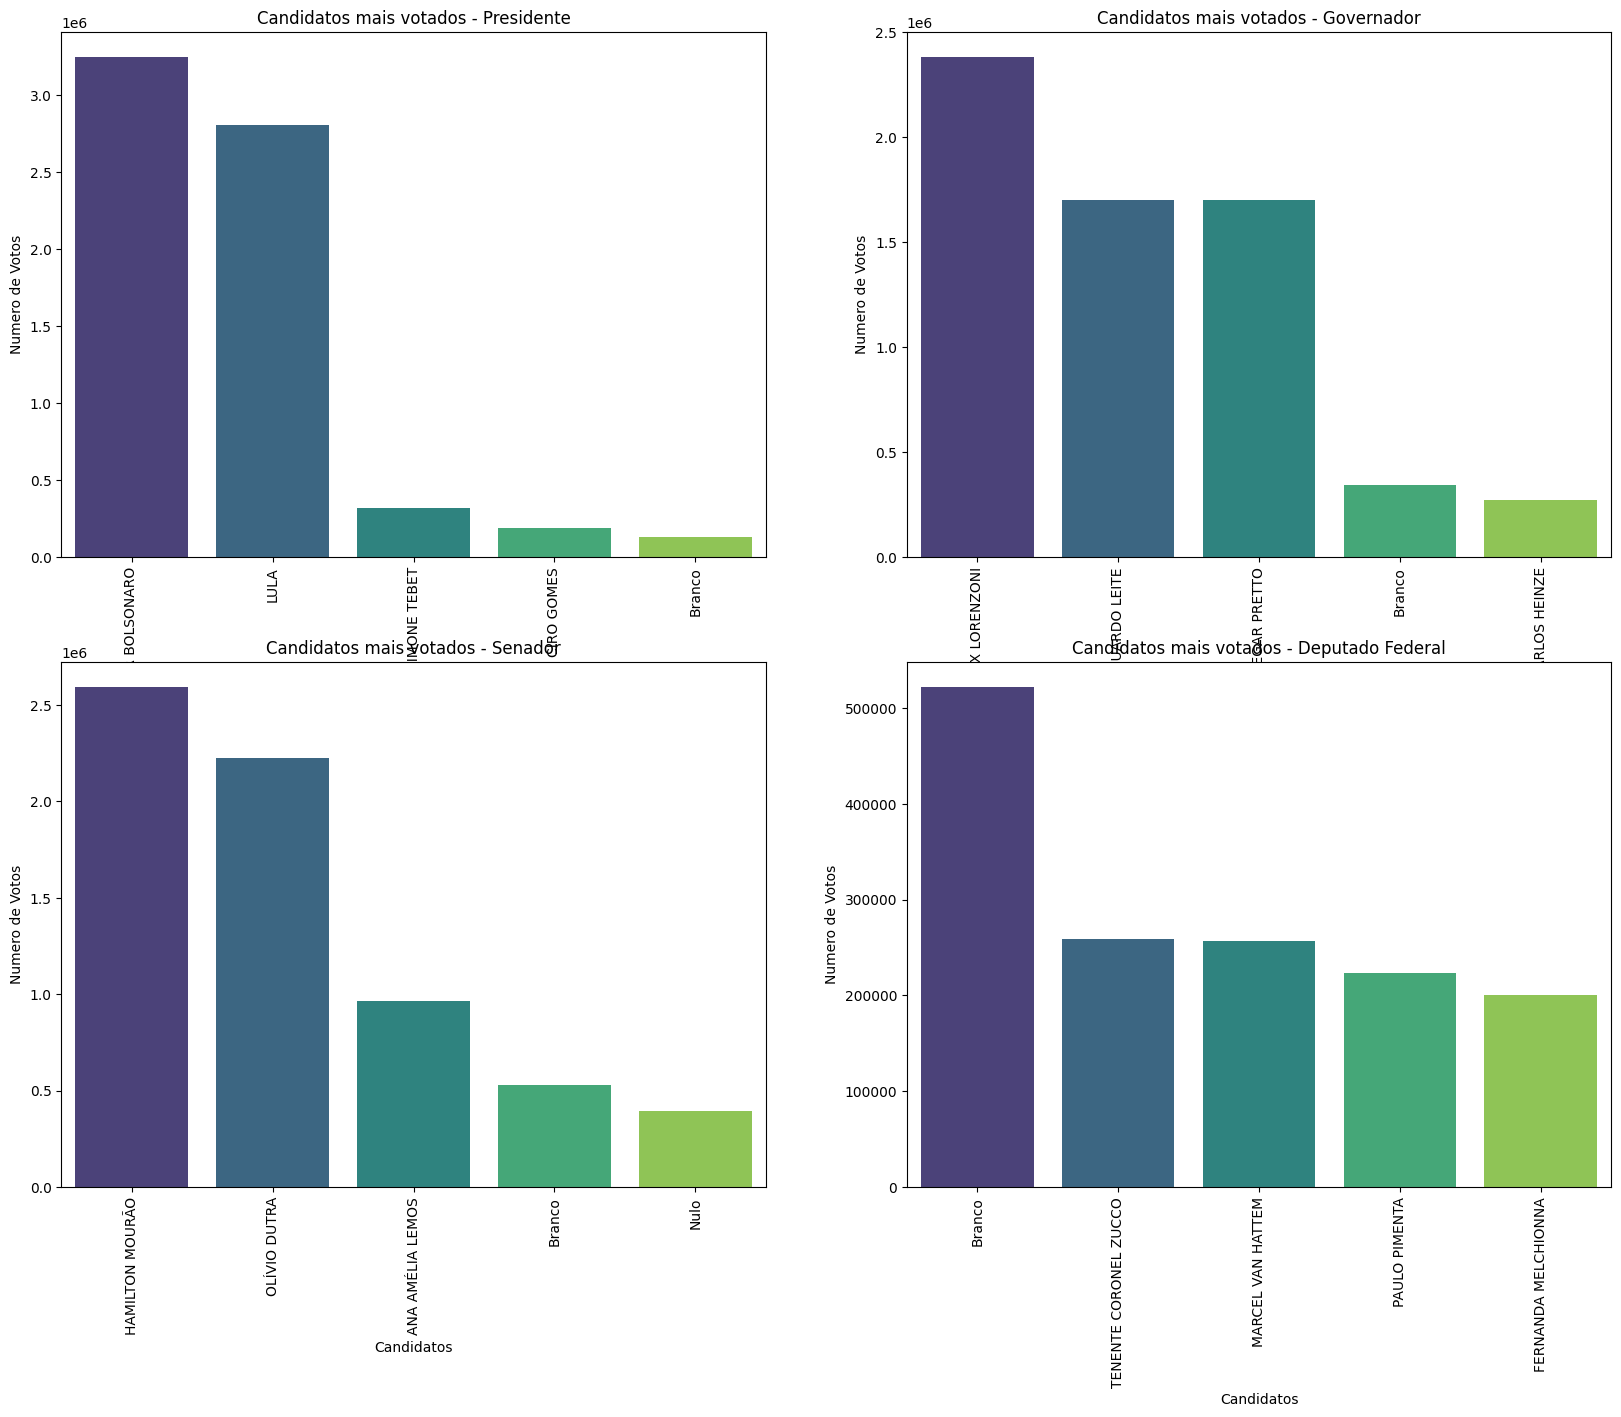

In [103]:


fig, axes = plt.subplots(2, 2, figsize=(20, 15))

axes = axes.flatten()

for i, cargo in enumerate(cargos):
    data = top_10_votos_por_cargo[cargo]
    labels = data['NM_VOTAVEL']
    sizes = data['QT_VOTOS']
    
    sns.barplot(x=labels, y=sizes, palette='viridis', hue=labels, ax=axes[i])
    axes[i].set_title(f'Candidatos mais votados - {cargo}')
    axes[i].set_xlabel('Candidatos')
    axes[i].set_ylabel('Numero de Votos')
    axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

### Municipios com mais votos brancos e nulos

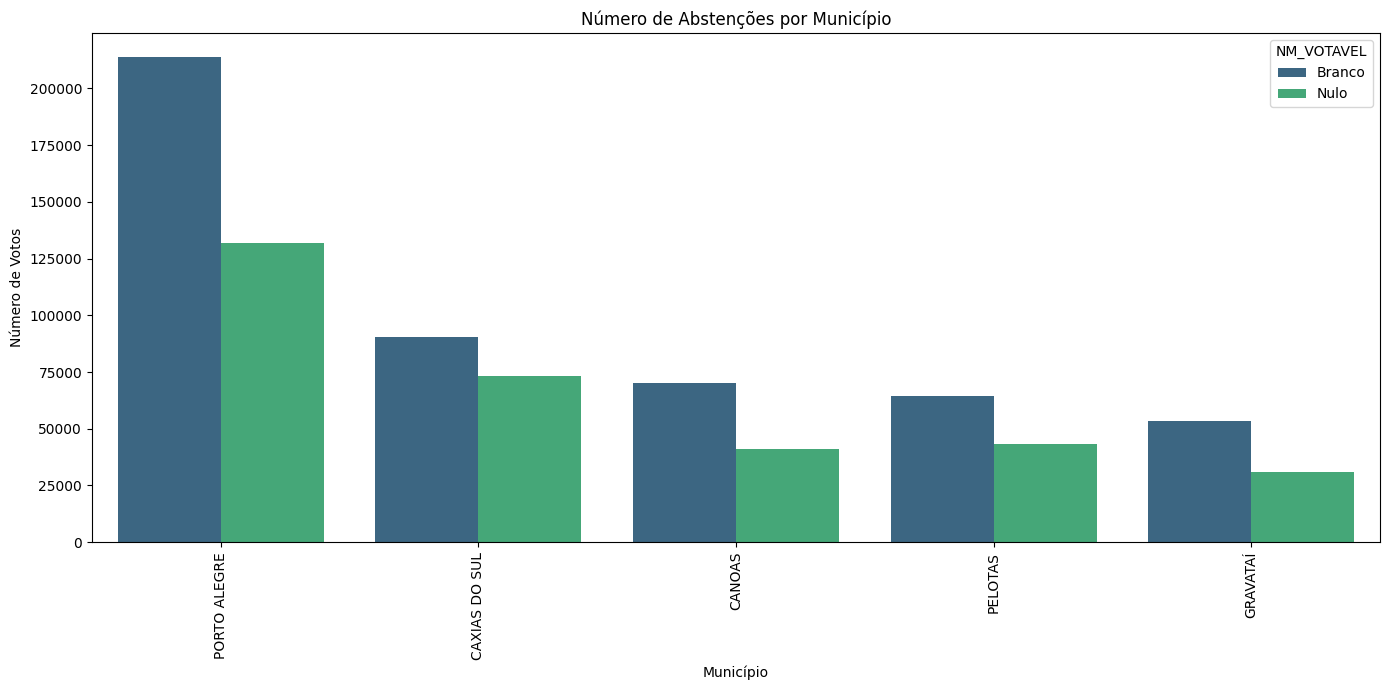

In [96]:
abstencoes_df = resultados_df[resultados_df['NM_VOTAVEL'].isin(['Branco', 'Nulo'])]

abstencoes_por_municipio = abstencoes_df.groupby(['NM_MUNICIPIO', 'NM_VOTAVEL'])['QT_VOTOS'].sum().reset_index()

abstencoes_por_municipio = abstencoes_por_municipio.sort_values(by='QT_VOTOS', ascending=False)

top_5_cities = abstencoes_por_municipio.groupby('NM_MUNICIPIO')['QT_VOTOS'].sum().nlargest(5).index

top_5_abstencoes = abstencoes_por_municipio[abstencoes_por_municipio['NM_MUNICIPIO'].isin(top_5_cities)]

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(x='NM_MUNICIPIO', y='QT_VOTOS', hue='NM_VOTAVEL', data=top_5_abstencoes, palette='viridis')
plt.title('Número de Abstenções por Município')
plt.xlabel('Município')
plt.ylabel('Número de Votos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Partidos com mais votos (Deputado Federal e Estadual)

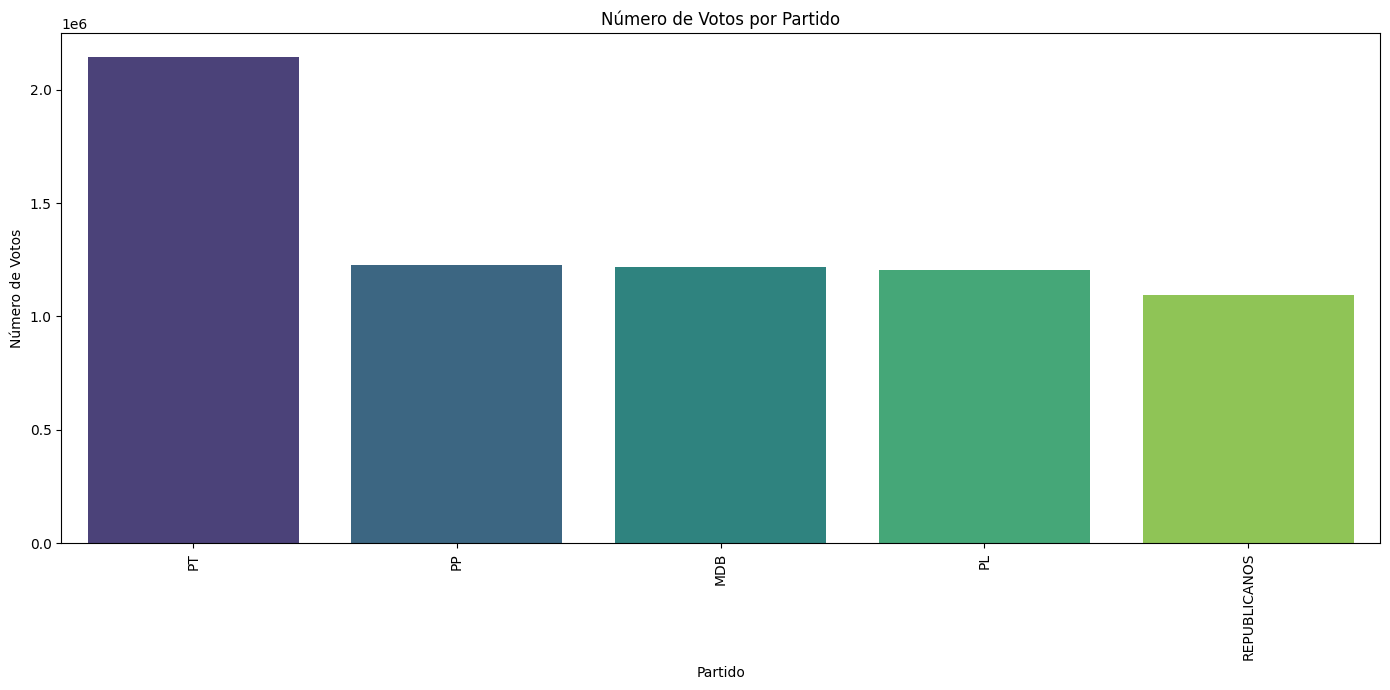

In [119]:
partidos = [partido for partido in resultados_df['SG_PARTIDO'].unique() if partido != '#NULO#']


votos_deputados = resultados_df[resultados_df['DS_CARGO_PERGUNTA'].isin(['Deputado Federal', 'Deputado Estadual'])].query('SG_PARTIDO in @partidos')


votos_por_partido = votos_deputados.groupby(['NR_TURNO', 'CD_ELEICAO', 'SG_PARTIDO'])['QT_VOTOS'].sum().reset_index().sort_values(by='QT_VOTOS', ascending=False)

top_5_partidos = votos_por_partido.groupby('SG_PARTIDO')['QT_VOTOS'].sum().nlargest(5).index

top_5_votos_partidos = votos_por_partido[votos_por_partido['SG_PARTIDO'].isin(top_5_partidos)]


plt.figure(figsize=(14, 7))
sns.barplot(x='SG_PARTIDO', y='QT_VOTOS', hue='SG_PARTIDO', data=top_5_votos_partidos, palette='viridis')

plt.title('Número de Votos por Partido')
plt.xlabel('Partido')
plt.ylabel('Número de Votos')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()
